# Missing Value

Missing values are 3 types:
1. MCAR: Missing Completely At Random : i.e., there is no relationship between missing data and other variable or other missing values in datasets

Missing Completely at Random (MCAR):

a)In MCAR, the missingness of data points is unrelated to both observed and unobserved data.
b)This means that the probability of a data point being missing is the same for all data points, whether observed or not.
c)In other words, there is no systematic pattern or reason for the missing values.
MCAR is considered a favorable missing data mechanism because it doesn't introduce bias if data is missing at random.

2. MNAR : Missing Not At Random : i.e., there is a relationship between missing data and other variable or other missing values in datasets

Missing Not at Random (MNAR) or Non-Ignorable Missingness:

a) In MNAR, the missingness of data points is related to unobserved data or factors that are not included in the dataset.
b) This means that the probability of a data point being missing depends on the values of the missing data itself or on unobservable factors.
c) MNAR is often the most challenging type of missing data to deal with because it can introduce bias and make it difficult to analyze the data accurately.

3. MAR : Missing At Random : i.e., here is a relationship between missing data and other observed variable however not with other unobserved variable

Missing at Random (MAR):

a) In MAR, the missingness of data points is related to observed data but not unobserved data.
b) This means that the probability of a data point being missing depends on the values of other observed variables.
c) MAR is common in real-world data and can often be handled through appropriate statistical methods.


Missing Data Handling:
1. Mean/Median/Mode Implementation
2. Random Sample Implementation
3. Capturing NAN values with a new feature
4. End Of Distribution Imputation
5. Arbitary Value Imputation

## Missing value Imputation For Numerical Variable:

### Handling MCAR:

1. Mean/Median/Mode Implementation
2. Random Sample Implementation

In [31]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976],
    "age": [24, 56, None, 76, None,15,30,None],  # Representing missing values as None
    "height": [5.4, None, 4.9, 6.0, 4.0,None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha","None,"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,age,height,Name
year,,,
1994,24.0,5.4,Priya
1995,56.0,NaN,Arnab
2000,NaN,4.9,Rishi
1997,76.0,6.0,Konark
2020,NaN,4.0,None
1874,15.0,NaN,Kisha
2020,30.0,NaN,Radha
1976,NaN,NaN,"None,"


In [76]:
df["age_na"]=df["age"]
df["age_na"]

year
1994    24.0
1995    56.0
2000     NaN
1997    76.0
2020     NaN
1874    15.0
2020    30.0
1976     NaN
Name: age_na, dtype: float64

In [69]:
sample_val=df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)

sample_val

year
1997    76.0
1994    24.0
1995    56.0
Name: age, dtype: float64

In [70]:
df[df["age"].isnull()].index

Int64Index([2000, 2020, 1976], dtype='int64', name='year')

In [71]:
sample_val.index=df[df["age"].isnull()].index
sample_val

year
2000    76.0
2020    24.0
1976    56.0
Name: age, dtype: float64

In [80]:
df.loc[df["age"].isnull(),"age_na"]=sample_val

In [81]:
df["age_na"]

year
1994    24.0
1995    56.0
2000    76.0
1997    76.0
2020    24.0
1874    15.0
2020    30.0
1976    56.0
Name: age_na, dtype: float64

In [95]:
def impute_na(df,var,median):
    df[var+"_median"]=df[var].fillna(median)
    df[var+"na"]=df[var]
    sample_val=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    sample_val.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+"na"]=sample_val

In [96]:
median=df["height"].median()
median

5.15

In [97]:
impute_na(df,"height",median)

In [98]:
df.head()

,age,height,Name,age_na,heightna,agena,height_median
year,,,,,,,
1994,24.0,5.4,Priya,24.0,5.4,24.0,5.40
1995,56.0,NaN,Arnab,56.0,6.0,56.0,5.15
2000,NaN,4.9,Rishi,76.0,4.9,76.0,4.90
1997,76.0,6.0,Konark,76.0,6.0,76.0,6.00
2020,NaN,4.0,None,24.0,4.0,24.0,4.00


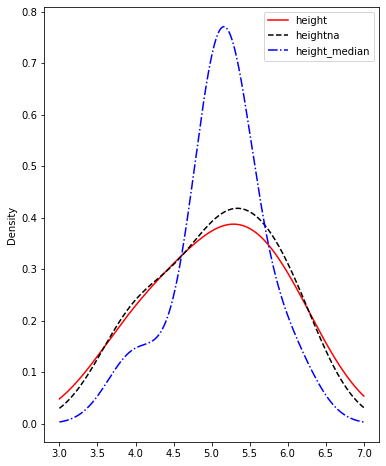

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))
df["height"].plot(kind="kde",axes=axes,color="red")
df["heightna"].plot(kind="kde",axes=axes,color="black",linestyle="--")
df["height_median"].plot(kind="kde",axes=axes,color="blue",linestyle="-.")
plt.legend()
plt.show()

Mean-Median_mode Advantage Disadvantage:
Advantage:
1. Easy to implement
2. Easy to understand
3. Faster way to get complete dataset

Disadvantage:
1. Distortion of variance
2. For mean specifically prone to outlier
3. impacts correlation

Random_sample_implementation Advantage Disadvantage:
Advantage:
1. Easy to implement
2. Easy to understand
3. Faster way to get complete dataset
4. There is less distortion of variance

Disadvantage:
1. Every situation randomness wont work

3. Capturing NAN values with a new feature

it works for MNAR data

In [146]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976],
    "ages": [24, 56, None, 76, None,15,30,None],  # Representing missing values as None
    "height": [5.4, None, 4.9, 6.0, 4.0,None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha","None,"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,ages,height,Name
year,,,
1994,24.0,5.4,Priya
1995,56.0,NaN,Arnab
2000,NaN,4.9,Rishi
1997,76.0,6.0,Konark
2020,NaN,4.0,None
1874,15.0,NaN,Kisha
2020,30.0,NaN,Radha
1976,NaN,NaN,"None,"


In [147]:
df["age_na"]=np.where(df.ages.isnull(),1,0)

In [148]:
df["age_na"]

year
1994    0
1995    0
2000    1
1997    0
2020    1
1874    0
2020    0
1976    1
Name: age_na, dtype: int32

In [149]:
df["ages"]=df.fillna(df["ages"].median())
df


,ages,height,Name,age_na
year,,,,
1994,24,5.4,Priya,0
1995,56,NaN,Arnab,0
2000,30,4.9,Rishi,1
1997,76,6.0,Konark,0
2020,30,4.0,None,1
1874,15,NaN,Kisha,0
2020,30,NaN,Radha,0
1976,30,NaN,"None,",1


Advantage:
1. Easy to implement
2. capture the importance of missing values

Disadvantages:
1. For highnumber of features, leads to curse of dimentionality as it will create new column for a particula feature with missing value
However it is absolutely fine for less number of column


#### 4. End Of Distribution Imputation

works in MNAR

In [151]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976],
    "ages": [24, 56, None, 76, None,15,30,None],  # Representing missing values as None
    "height": [5.4, None, 4.9, 6.0, 4.0,None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha","None,"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,ages,height,Name
year,,,
1994,24.0,5.4,Priya
1995,56.0,NaN,Arnab
2000,NaN,4.9,Rishi
1997,76.0,6.0,Konark
2020,NaN,4.0,None
1874,15.0,NaN,Kisha
2020,30.0,NaN,Radha
1976,NaN,NaN,"None,"


In [160]:
def impute_na(df,var,extreeme):
    df[var+"_extreem"]=df[var].fillna(extreem)

In [161]:
extreem=df["ages"].mean()+3*df["ages"].std()
extreem

115.69039674024769

In [162]:
impute_na(df,"ages",extreem)

In [163]:
df

,ages,height,Name,ages_extreem
year,,,,
1994,24.0,5.4,Priya,24.000000
1995,56.0,NaN,Arnab,56.000000
2000,NaN,4.9,Rishi,115.690397
1997,76.0,6.0,Konark,76.000000
2020,NaN,4.0,None,115.690397
1874,15.0,NaN,Kisha,15.000000
2020,30.0,NaN,Radha,30.000000
1976,NaN,NaN,"None,",115.690397


No handles with labels found to put in legend.


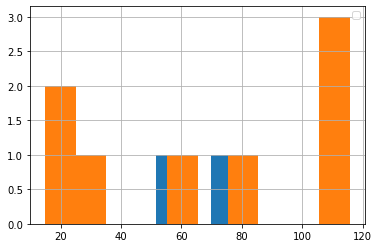

In [172]:

df["ages"].hist()
df["ages_extreem"].hist()
plt.legend()

#### Advantages:

Simple to Implement: End-of-distribution imputation is easy to implement, making it a quick and straightforward solution for handling missing values.

Preserves Data Distribution: By replacing missing values with extreme values from the distribution, it can help preserve the general characteristics and patterns of the data.

Useful for Outliers: It can be effective when missing values are associated with outliers or rare events, as it replaces them with values that are already extreme.

Applicable to Numeric Data: This technique is primarily used for numerical data, making it suitable for continuous or interval data types.

#### Disadvantages:

Potential Distortion: End-of-distribution imputation can distort the original data distribution, especially if the missing values are not truly extreme or if they follow a different pattern.

Sensitive to Outliers: It can be sensitive to outliers because it replaces missing values with extreme values, potentially exaggerating the presence of outliers.

Loss of Information: When missing values are replaced with extreme values, it may result in a loss of information and introduce bias, particularly if the missing values are not related to extreme conditions.

Not Suitable for Categorical Data: End-of-distribution imputation is typically not suitable for categorical or nominal data, as it's designed for numerical values.

May Affect Statistical Measures: It can impact statistical measures such as means, variances, and correlations, leading to inaccurate summaries of the data.


### 5. Arbitary Value Imputation

impute nan value by any arbitary value which is not present in the observation of that feature

In [174]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976],
    "ages": [24, 56, None, 76, None,15,30,None],  # Representing missing values as None
    "height": [5.4, None, 4.9, 6.0, 4.0,None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha","None,"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,ages,height,Name
year,,,
1994,24.0,5.4,Priya
1995,56.0,NaN,Arnab
2000,NaN,4.9,Rishi
1997,76.0,6.0,Konark
2020,NaN,4.0,None
1874,15.0,NaN,Kisha
2020,30.0,NaN,Radha
1976,NaN,NaN,"None,"


<AxesSubplot:>

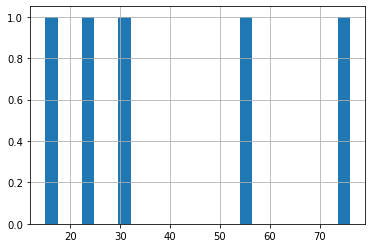

In [176]:
df["ages"].hist(bins=25)

In [177]:
def impute_na(df,var):
    df[var+"_hundred"]=df[var].fillna(100)

In [180]:
impute_na(df,"ages")

In [181]:
df

,ages,height,Name,ages_hundred
year,,,,
1994,24.0,5.4,Priya,24.0
1995,56.0,NaN,Arnab,56.0
2000,NaN,4.9,Rishi,100.0
1997,76.0,6.0,Konark,76.0
2020,NaN,4.0,None,100.0
1874,15.0,NaN,Kisha,15.0
2020,30.0,NaN,Radha,30.0
1976,NaN,NaN,"None,",100.0


Advantages:
   1. Easy to implement
   2. capture the importance of missing value
   
Disadvantages:
   1. distortion of original distribution
   2. Hard to decide which value to use

# Missing value Imputation For Categorical Variable:

1. Frequent Category Imputation
2. Adding a var to the place of NAN value

#### 1. Frequent Category Imputation

In [184]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976,2022,1943,1994,2006],
    "sex": ["M",None, "F","F","F",None,None,"M","F",None,"M","F"],  # Representing missing values as None
    "syb": ["y", None, "N", None, "Y",None,None,None,"N",None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha",None,"Raja","Krish",None,"Riya"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,sex,syb,Name
year,,,
1994,M,y,Priya
1995,None,None,Arnab
2000,F,N,Rishi
1997,F,None,Konark
2020,F,Y,None
1874,None,None,Kisha
2020,None,None,Radha
1976,M,None,None
2022,F,N,Raja


In [187]:
df.isnull().sum()

sex     4
syb     8
Name    3
dtype: int64

In [197]:
df["sex"].value_counts() # F is most frequent one

F    5
M    3
Name: sex, dtype: int64

In [205]:
df["sex"].value_counts().index[0] # Fetching the most frequent category name 

'F'

In [210]:
df["sex"].mode()[0]# Fetching the most frequent category name (another way to do that)

'F'

In [215]:
df.groupby("sex")["sex"].count().index[0] # Fetching the most frequent category name (another way to do that)

'F'

In [216]:
#creating the function for imputation
def impute_na(df,var):
    most_freq_cat=df["sex"].mode()[0]
    df[var+"_na"]=df[var].fillna(most_freq_cat)

In [217]:
impute_na(df,"sex")

In [218]:
df

,sex,syb,Name,sex_na
year,,,,
1994,M,y,Priya,M
1995,None,None,Arnab,F
2000,F,N,Rishi,F
1997,F,None,Konark,F
2020,F,Y,None,F
1874,None,None,Kisha,F
2020,None,None,Radha,F
1976,M,None,None,M
2022,F,N,Raja,F


#### Most Frequent Imputation
#### Advantages:
1. Easy to imputation
2. Faster to implement

#### Disadvantages:
1. Distortion of relation of frequent label
2. When more missing value is present, it use more frequent label in over represented way

#### 2. Adding a var to the place of NAN value

In [219]:
def imupute_na_var(df,var):
    df[var+"nan"]=np.where(df[var].isnull(),1,0)
    most_freq=df[var].mode()[0]
    df[var]=df[var].fillna(most_freq)

In [220]:
imupute_na_var(df,"sex")

In [221]:
df

,sex,syb,Name,sex_na,sexnan
year,,,,,
1994,M,y,Priya,M,0
1995,F,None,Arnab,F,1
2000,F,N,Rishi,F,0
1997,F,None,Konark,F,0
2020,F,Y,None,F,0
1874,F,None,Kisha,F,1
2020,F,None,Radha,F,1
1976,M,None,None,M,0
2022,F,N,Raja,F,0


Advantages:
    1. Capture the importance of missing value
    
Disadvantages:
    1. lead to increase number of features, i.e., causeing curse of dimention

#### Replacing NAN with other category
( here we are treating Nan as a different set of category. This is useful when Count of Nan is high)

In [223]:
import pandas as pd
import numpy as np

data = {
    "year": [1994, 1995, 2000, 1997, 2020,1874,2020,1976,2022,1943,1994,2006],
    "sex": ["M",None, "F","F","F",None,None,"M","F",None,"M","F"],  # Representing missing values as None
    "syb": ["y", None, "N", None, "Y",None,None,None,"N",None,None,None],  # Representing missing values as None
    "Name": ["Priya", "Arnab", "Rishi", "Konark", None,"Kisha","Radha",None,"Raja","Krish",None,"Riya"],  # Representing missing values as None
}

df = pd.DataFrame(data).set_index("year")
df

,sex,syb,Name
year,,,
1994,M,y,Priya
1995,None,None,Arnab
2000,F,N,Rishi
1997,F,None,Konark
2020,F,Y,None
1874,None,None,Kisha
2020,None,None,Radha
1976,M,None,None
2022,F,N,Raja


In [224]:
def impute_na_set(df,var):
    df[var]=np.where(df[var].isnull(),"Missing",df[var])

In [225]:
impute_na_set(df,"syb")

In [226]:
df

,sex,syb,Name
year,,,
1994,M,y,Priya
1995,None,Missing,Arnab
2000,F,N,Rishi
1997,F,Missing,Konark
2020,F,Y,None
1874,None,Missing,Kisha
2020,None,Missing,Radha
1976,M,Missing,None
2022,F,N,Raja
